# Importing the dataset and the required Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("uber-raw-data-apr14.csv")

In [2]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [3]:
data["Date/Time"]=data["Date/Time"].map(pd.to_datetime)
data

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764


# Data according to days and hours

In [4]:
data["day"]=data["Date/Time"].apply(lambda x: x.day)
data["weekdays"]=data["Date/Time"].apply(lambda x: x.weekday())
data["hour"]=data["Date/Time"].apply(lambda x: x.hour)

In [5]:
data

,Date/Time,Lat,Lon,Base,day,weekdays,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23


# Look at each day to see on which day the Uber trips were highest

C:\Users\fatimasultana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

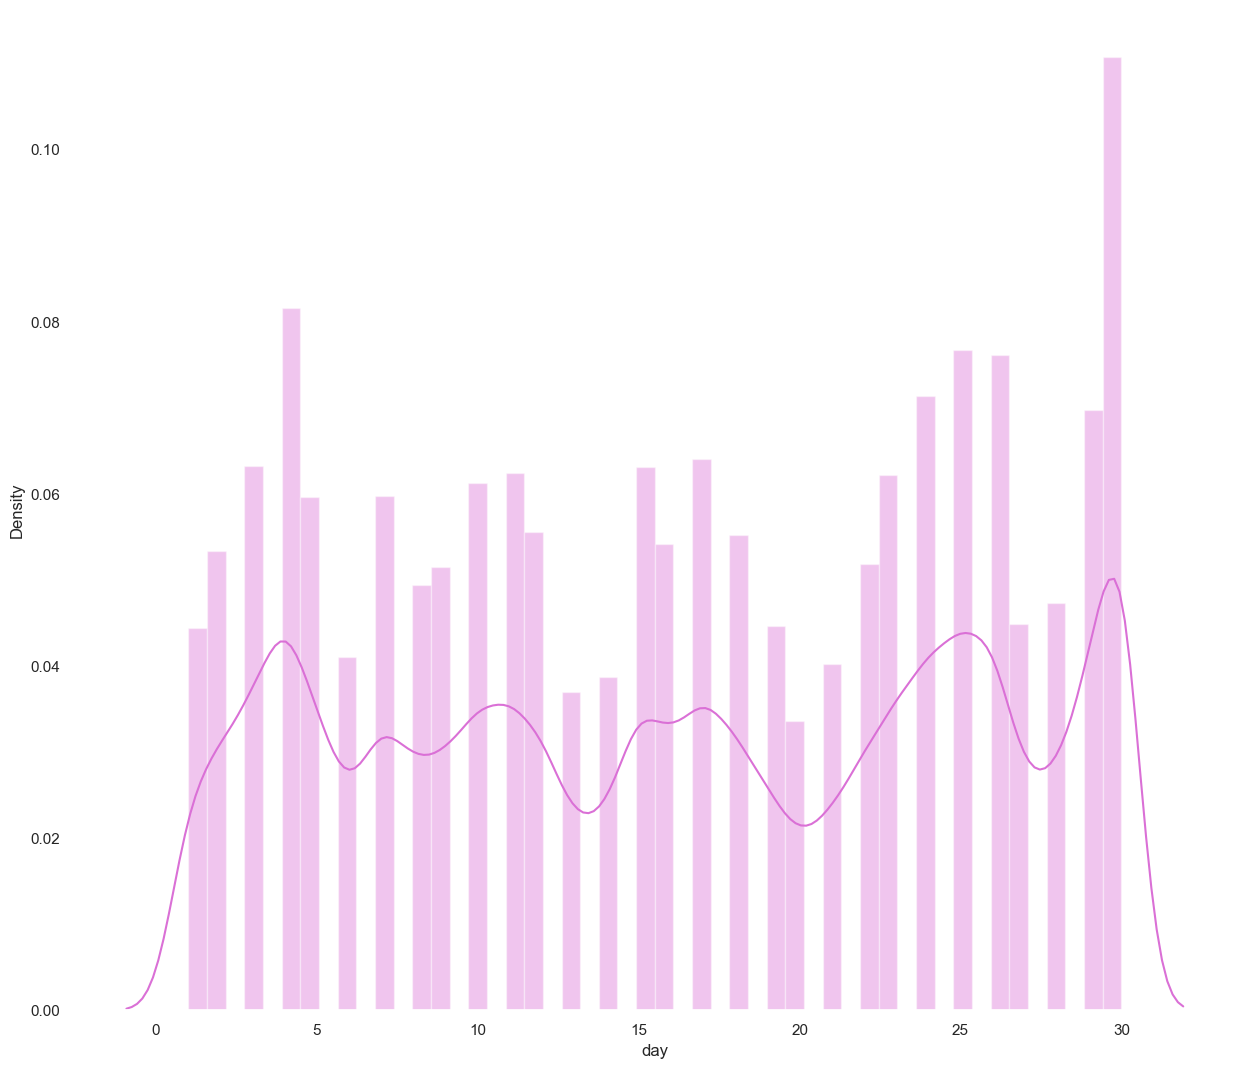

In [23]:
sns.set(rc={'figure.figsize':(15,13), 'axes.facecolor':'white'})
sns.distplot(data["day"], color="orchid")

# Analyse the Uber trips according to the hours

C:\Users\fatimasultana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

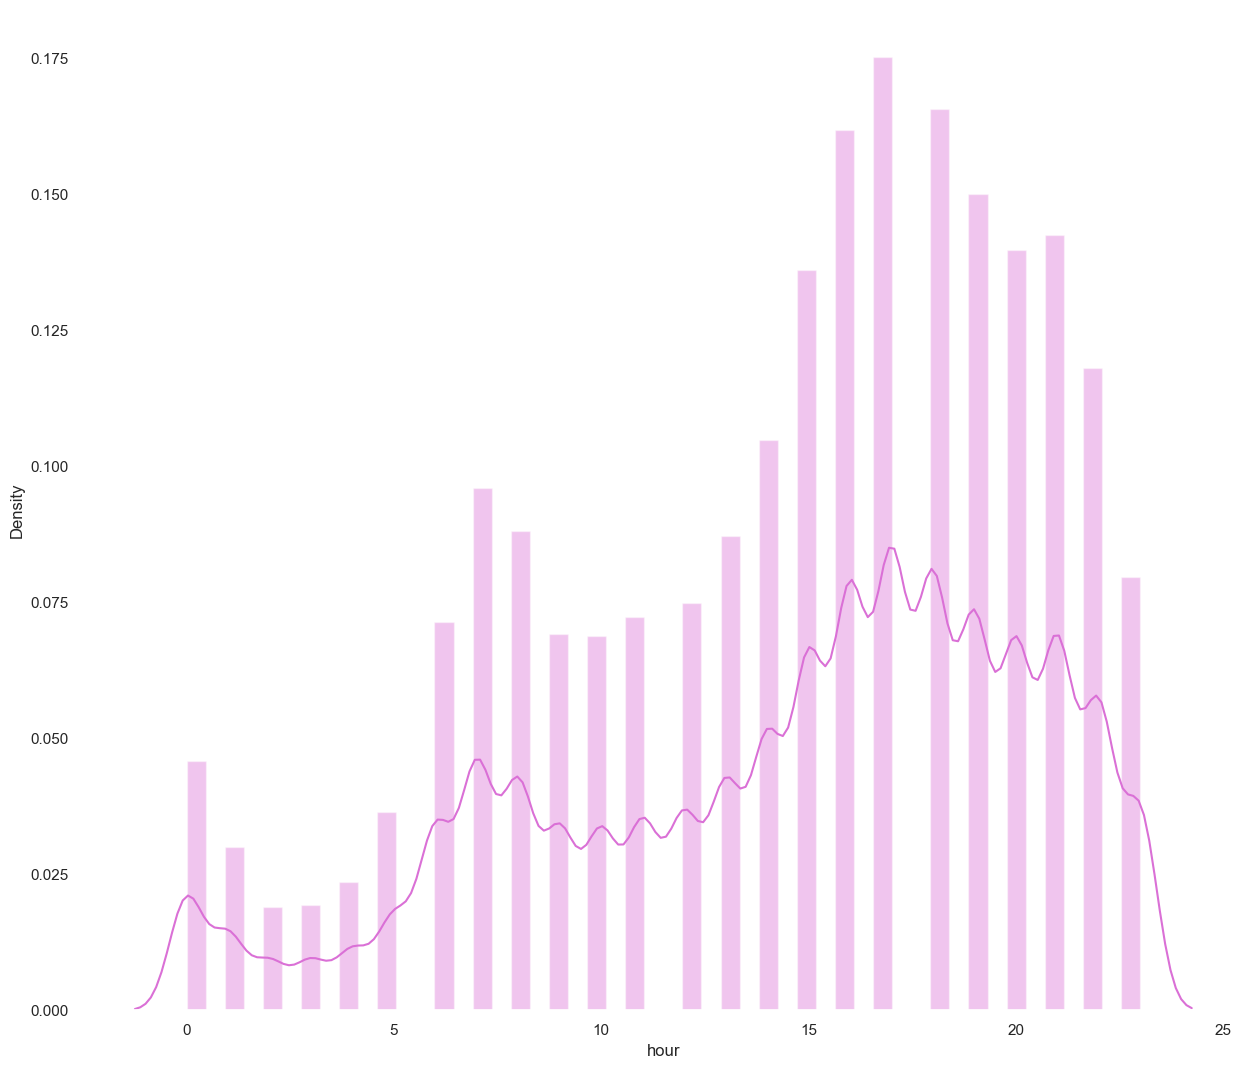

In [24]:
sns.distplot(data["hour"],color="orchid")

# Analyse the Uber trips according to the weekdays

C:\Users\fatimasultana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weekdays', ylabel='Density'>

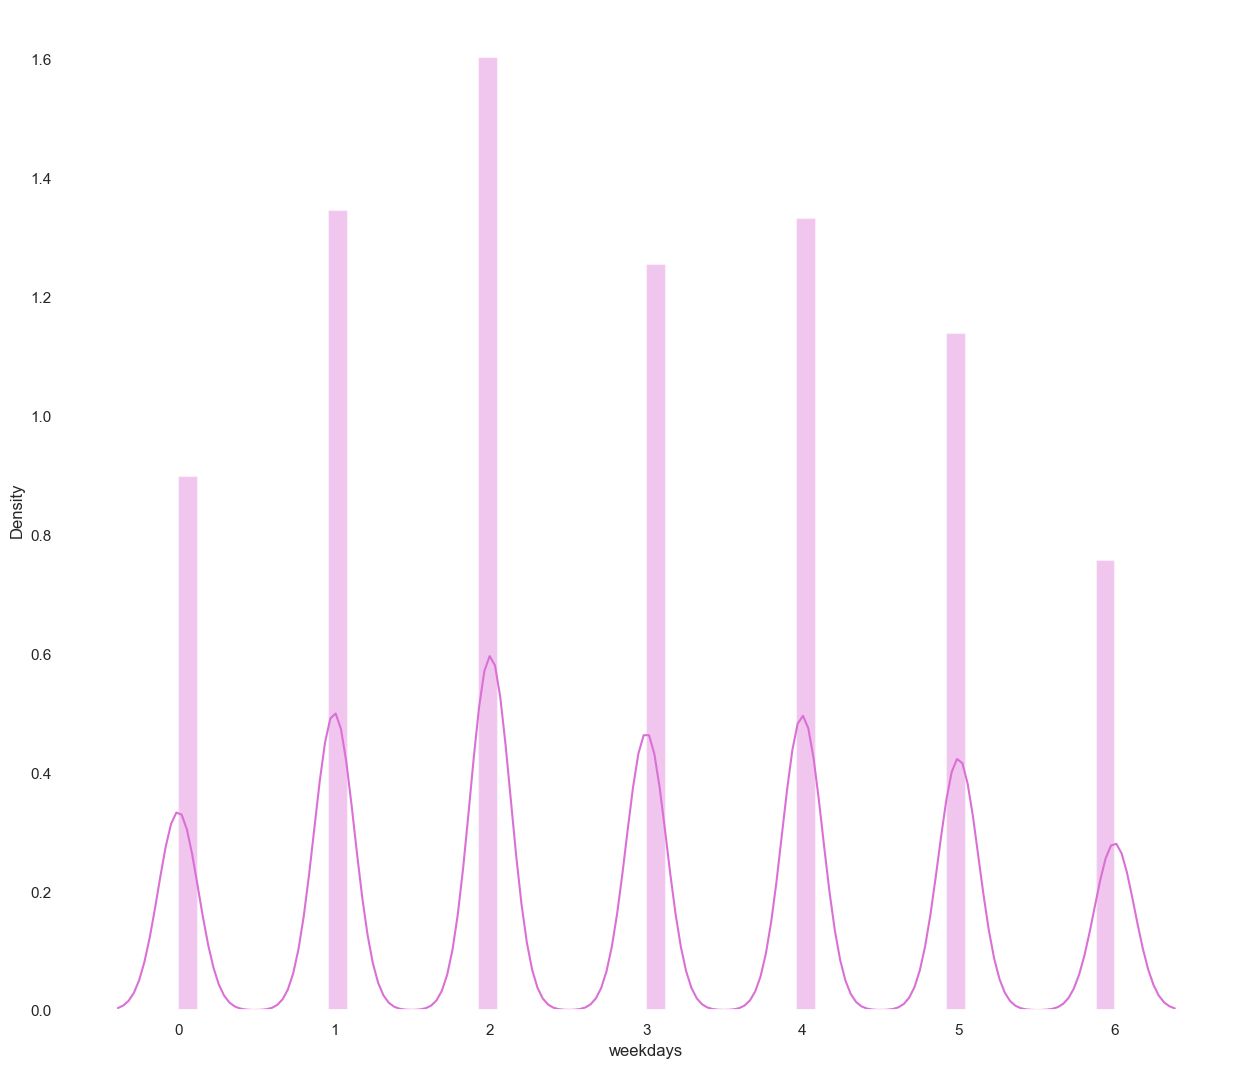

In [25]:
sns.distplot(data["weekdays"],color="orchid")

# Correlation between hours and weekdays

<AxesSubplot:xlabel='hour', ylabel='weekdays'>

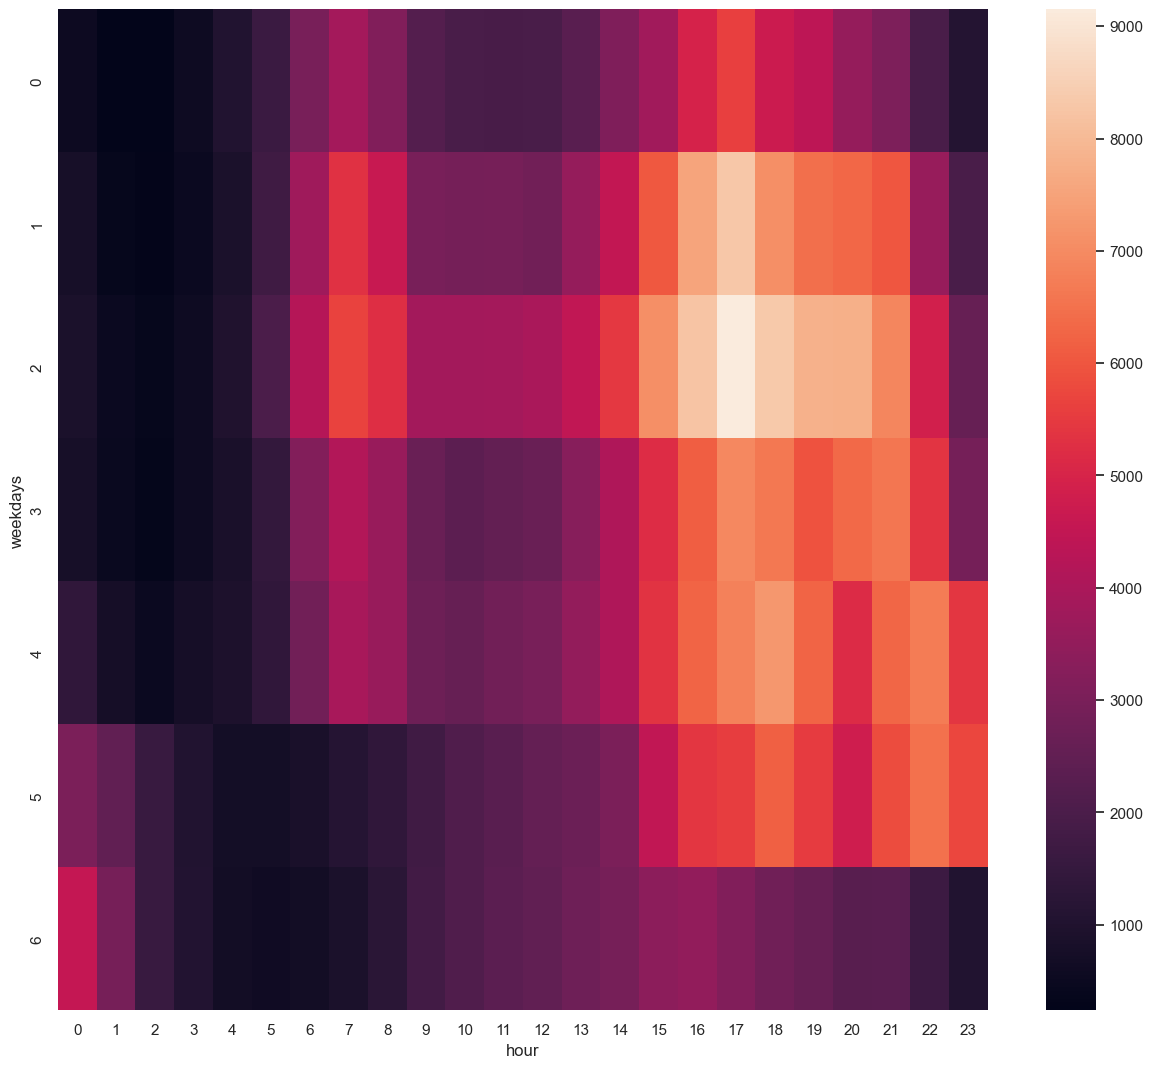

In [26]:
df=data.groupby(["weekdays","hour"]).apply(lambda x: len(x))
df=df.unstack()
sns.heatmap(df,annot=False)

# Density of Uber trips according to the regions of the New Your city 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Lon', ylabel='Lat'>

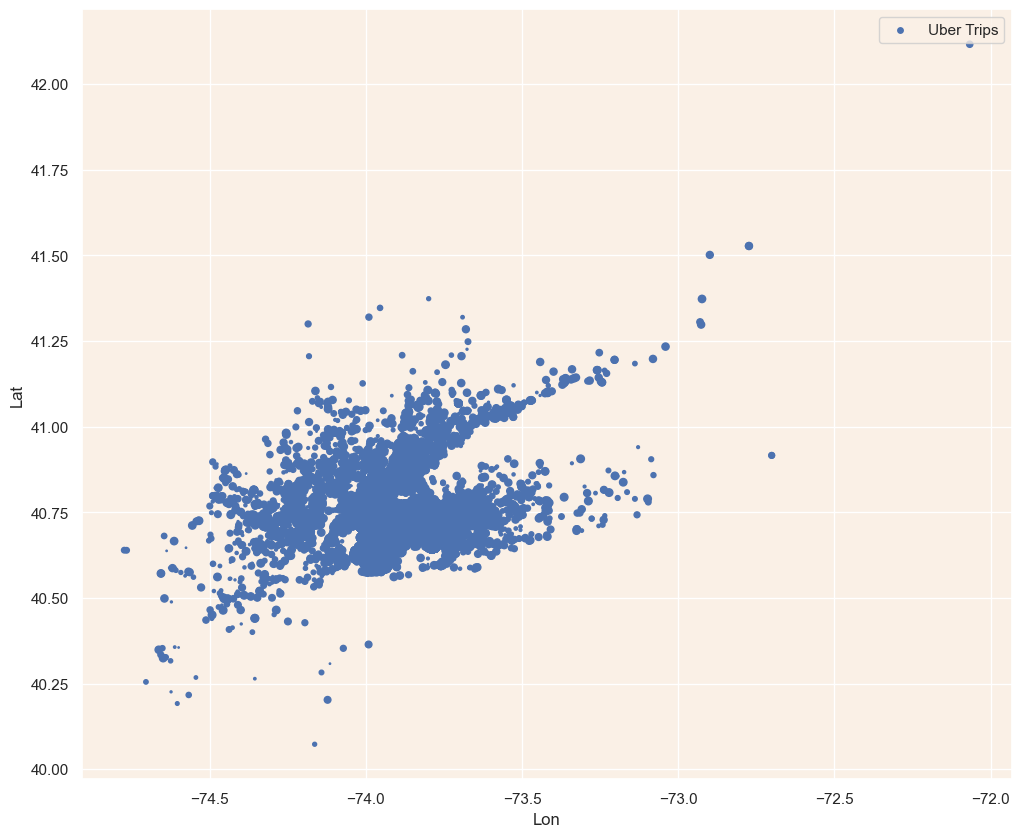

In [28]:
sns.set(rc={'axes.facecolor':'linen'})
data.plot(kind='scatter',x='Lon', y='Lat', s=data['day'], label='Uber Trips', figsize=(12, 10))